# Compare future temperature pathways from KNMI14, CMIP5 and CMIP6

### Start with developping a function for CMIP6

In [66]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import IPython.display

import sys
sys.path.append('../code')
import func_misc as misc

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [2]:
data_path = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
data_cmip6_temp = data_path+'Data_CMIP6/tas-global-area-averaged/'

#MOD = []

In [89]:
### Function that outputs a numpy array, to use for the projection code
def tglob_cmip6(INFO, DIR_T, ENS, SCE, start_date, ye):
    '''Read the NetCDF files of monthly temperature for each CMIP6 model and 
    store yearly averged values in and array'''
    nb_y = ye-start_date+1
    files_all = os.listdir(DIR_T)
    files_all.remove('README')
    info_df = pd.DataFrame(columns=['Model', 'Experiment', 'Ensemble'])
    for i in range(len(files_all)):
        st = files_all[i].split('_')
        if len(st) != 3:
            print('WARNING!!! This file name is not standard')
            print(i)
            print(st)
        info_df.loc[i] = [ st[0], st[1], st[2] ]
    sel_df = info_df[info_df['Ensemble'] == ENS+'.nc'][
        info_df['Experiment'] == SCE][info_df['Model'] != 'GFDL-ESM4'][
        info_df['Model'] !='BCC-ESM1']
    
    # Notes: Removed 'GFDL-ESM4' because no historical run is available
    # Removed 'BCC-ESM1' because projections stop in 2055
    nb_MOD    = len(sel_df)
    if INFO:
        print('Number of models used for scenario '+ SCE + ' : ' + str(nb_MOD))
        print('Models: ')
        display(sel_df)
    
    TGLOB    = np.zeros([nb_MOD, nb_y])

    for m in range(0,nb_MOD):
        TEMP_SCE_ds = xr.open_dataset(DIR_T+sel_df.iloc[m][0]+'_'+sel_df.iloc[m][1]+'_'+sel_df.iloc[m][2])
        if (sel_df.iloc[m][0]  == 'EC-Earth3') and (sel_df.iloc[m][2] == 'r1i1p1f1.nc'):
            TEMP_HIST_ds = xr.open_dataset(DIR_T+sel_df.iloc[m][0]+'_historical_r2i1p1f1.nc')
        else:
            TEMP_HIST_ds = xr.open_dataset(DIR_T+sel_df.iloc[m][0]+'_historical_'+sel_df.iloc[m][2])
        TEMP_ALL_ds = xr.concat([TEMP_SCE_ds, TEMP_HIST_ds], 'time')
        TEMP_ALL_y_ds = TEMP_ALL_ds.groupby('year').mean(dim='time')
        nb_y_avail = len(TEMP_ALL_y_ds.year.loc[start_date:ye])
        TGLOB[m,:nb_y_avail] = TEMP_ALL_y_ds.tas.loc[start_date:ye]
        if (nb_y_avail != nb_y): #and (TEMP_ALL_y_ds.year[0] == start_date)
            print('Some years are missing for '+sel_df.iloc[m][0])
            print(TEMP_ALL_y_ds.year.loc[start_date:ye].values)
            print('Filing up the gap by extrapolation')
            TGLOB[m,-1] = TGLOB[m,-2]
        
    return TGLOB

In [86]:
# Small test
ens = 'r1i1p1f1'
exp = 'ssp370'
start_date = 1980
ye = 2100
TGLOG_cmip6 = tglob_cmip6(True, data_cmip6_temp, ens, exp, start_date, ye)
TGLOG_cmip6

Number of models used for scenario ssp370 : 14
Models: 


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Model,Experiment,Ensemble
129,MRI-ESM2-0,ssp370,r1i1p1f1.nc
158,MIROC6,ssp370,r1i1p1f1.nc
215,MPI-ESM1-2-HR,ssp370,r1i1p1f1.nc
270,CESM2,ssp370,r1i1p1f1.nc
281,CAMS-CSM1-0,ssp370,r1i1p1f1.nc
409,INM-CM4-8,ssp370,r1i1p1f1.nc
410,CESM2-WACCM,ssp370,r1i1p1f1.nc
417,EC-Earth3,ssp370,r1i1p1f1.nc
427,INM-CM5-0,ssp370,r1i1p1f1.nc
491,BCC-ESM1,ssp370,r1i1p1f1.nc


Some years are missing for CAMS-CSM1-0
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099]
Filing up the gap by extrapolation
Some years are missing for BCC-ESM1
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2

array([[287.06617181, 287.17125395, 287.28047717, ..., 290.48560711,
        290.74208532, 290.90665885],
       [288.50585092, 288.51363214, 288.75764439, ..., 291.47717318,
        291.73695589, 292.04933012],
       [287.7263127 , 287.65260794, 287.57741935, ..., 290.7744591 ,
        290.86319249, 290.88087364],
       ...,
       [287.1722281 , 287.23706465, 287.40515948, ..., 293.08708991,
        293.18439834, 293.14014839],
       [287.31347691, 287.39157686, 287.28458923, ..., 291.24290334,
        291.17354392, 291.26015877],
       [287.59110342, 287.76820724, 287.44741216, ..., 291.76057854,
        291.86140954, 292.05185268]])

In [103]:
N = int(1e5)
start_date = 1980    # Start reading data
ys = 2006   # Starting point for the integration, if this is changed problems in functions
ye = 2100   # End year for computation

TIME = np.arange( start_date, ye + 1 )
NormD  = np.random.normal(0, 1, N)
GAM = 1
ens = 'r1i1p1f1'

Td_mean_df= pd.DataFrame({'time': np.arange(ys,ye+1)})
for exp in ('ssp126', 'ssp245', 'ssp370', 'ssp585'):
    TGLOB = tglob_cmip6(True, data_cmip6_temp, ens, exp, start_date, ye)
    i_ys   = np.where(TIME == ys)[0][0]
    TGLOBs = TGLOB[:,i_ys:]
    Tref = misc.Tref(1991, 2020, TGLOB, TIME)
    nb_MOD = TGLOBs.shape[0]
    for m in range(0, nb_MOD):
        TGLOBs[m, :] = TGLOBs[m, :] - Tref[m]
    Td_mean_df[exp]  = TGLOBs.mean(axis=0) # Compute the inter-model mean for each time
    
Td_mean_df = Td_mean_df.set_index('time')
Td_mean_df#.plot()

Number of models used for scenario ssp126 : 14
Models: 


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Model,Experiment,Ensemble
14,CAMS-CSM1-0,ssp126,r1i1p1f1.nc
17,CESM2,ssp126,r1i1p1f1.nc
104,MPI-ESM1-2-HR,ssp126,r1i1p1f1.nc
124,MIROC6,ssp126,r1i1p1f1.nc
179,MRI-ESM2-0,ssp126,r1i1p1f1.nc
335,EC-Earth3-Veg,ssp126,r1i1p1f1.nc
362,AWI-CM-1-1-MR,ssp126,r1i1p1f1.nc
395,BCC-CSM2-MR,ssp126,r1i1p1f1.nc
403,CanESM5,ssp126,r1i1p1f1.nc
456,EC-Earth3,ssp126,r1i1p1f1.nc


Some years are missing for CAMS-CSM1-0
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099]
Filing up the gap by extrapolation
Number of models used for scenario ssp245 : 14
Models: 


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Model,Experiment,Ensemble
103,MRI-ESM2-0,ssp245,r1i1p1f1.nc
168,MPI-ESM1-2-HR,ssp245,r1i1p1f1.nc
186,MIROC6,ssp245,r1i1p1f1.nc
224,CESM2,ssp245,r1i1p1f1.nc
226,CAMS-CSM1-0,ssp245,r1i1p1f1.nc
375,NESM3,ssp245,r1i1p1f1.nc
382,INM-CM5-0,ssp245,r1i1p1f1.nc
385,EC-Earth3,ssp245,r1i1p1f1.nc
433,CESM2-WACCM,ssp245,r1i1p1f1.nc
435,INM-CM4-8,ssp245,r1i1p1f1.nc


Some years are missing for CAMS-CSM1-0
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099]
Filing up the gap by extrapolation
Number of models used for scenario ssp370 : 13
Models: 


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Model,Experiment,Ensemble
129,MRI-ESM2-0,ssp370,r1i1p1f1.nc
158,MIROC6,ssp370,r1i1p1f1.nc
215,MPI-ESM1-2-HR,ssp370,r1i1p1f1.nc
270,CESM2,ssp370,r1i1p1f1.nc
281,CAMS-CSM1-0,ssp370,r1i1p1f1.nc
409,INM-CM4-8,ssp370,r1i1p1f1.nc
410,CESM2-WACCM,ssp370,r1i1p1f1.nc
417,EC-Earth3,ssp370,r1i1p1f1.nc
427,INM-CM5-0,ssp370,r1i1p1f1.nc
505,BCC-CSM2-MR,ssp370,r1i1p1f1.nc


Some years are missing for CAMS-CSM1-0
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099]
Filing up the gap by extrapolation
Number of models used for scenario ssp585 : 14
Models: 


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Model,Experiment,Ensemble
22,CAMS-CSM1-0,ssp585,r1i1p1f1.nc
31,CESM2,ssp585,r1i1p1f1.nc
87,MPI-ESM1-2-HR,ssp585,r1i1p1f1.nc
133,MIROC6,ssp585,r1i1p1f1.nc
163,MRI-ESM2-0,ssp585,r1i1p1f1.nc
306,EC-Earth3-Veg,ssp585,r1i1p1f1.nc
348,AWI-CM-1-1-MR,ssp585,r1i1p1f1.nc
393,CanESM5,ssp585,r1i1p1f1.nc
402,BCC-CSM2-MR,ssp585,r1i1p1f1.nc
471,INM-CM5-0,ssp585,r1i1p1f1.nc


Some years are missing for CAMS-CSM1-0
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049
 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063
 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077
 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091
 2092 2093 2094 2095 2096 2097 2098 2099]
Filing up the gap by extrapolation


,ssp126,ssp245,ssp370,ssp585
time,,,,
2006,0.027915,0.031501,0.029763,0.023609
2007,0.051559,0.055145,0.059001,0.047253
2008,0.076916,0.080503,0.078211,0.072611
2009,0.102475,0.106061,0.107173,0.098170
2010,0.089155,0.092742,0.095476,0.084850
2011,0.126617,0.130203,0.114016,0.122311
2012,0.191124,0.194710,0.178706,0.186819
2013,0.229235,0.232821,0.215812,0.224929
2014,0.198758,0.202344,0.197088,0.194453


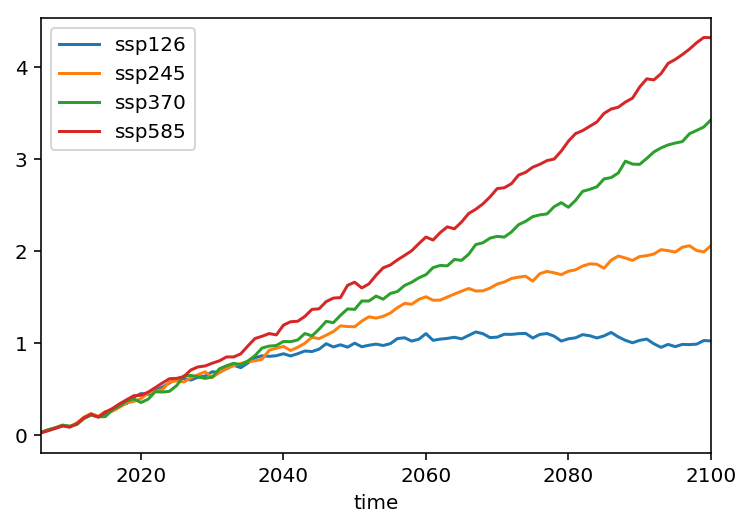

In [104]:
Td_mean_df.plot()

### Compute a few numbers for Rob and others

In [105]:
Td_mean_df.loc[2036:2065].mean()

ssp126    0.968842
ssp245    1.211009
ssp370    1.389181
ssp585    1.652946
dtype: float64

In [106]:
Td_mean_df.loc[2071:2100].mean()

ssp126    1.044050
ssp245    1.871068
ssp370    2.784994
ssp585    3.507712
dtype: float64

### Read CMIP5 data

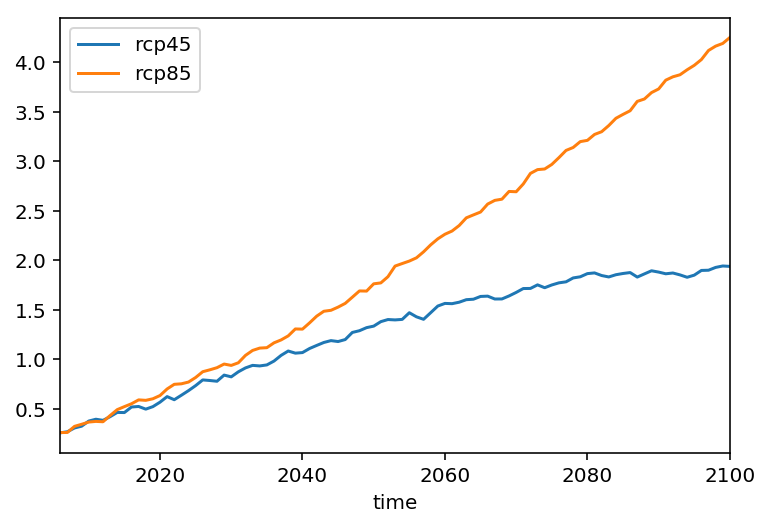

In [67]:
ROOT = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/'
DIR_T = ROOT+'Data_AR5/Tglobal/'
MOD = ["ACCESS1-0","BCC-CSM1-1","CanESM2","CNRM-CM5","CSIRO-Mk3-6-0","GFDL-ESM2G", \
    "GFDL-ESM2M","GISS-E2-R","HadGEM2-CC","HadGEM2-ES","inmcm4","IPSL-CM5A-LR", \
    "IPSL-CM5A-MR","MIROC5","MIROC-ESM-CHEM","MIROC-ESM","MPI-ESM-LR","MPI-ESM-MR", \
    "MRI-CGCM3","NorESM1-ME","NorESM1-M"]
N = int(1e5)
start_date = 1980    # Start reading data
ys = 2006   # Starting point for the integration, if this is changed problems in functions
ye = 2100   # End year for computation
nb_y = ye-start_date+1
TIME       = np.arange( start_date, ye + 1 )
#SCE = 'rcp85'
NormD  = np.random.normal(0, 1, N)
GAM = 1

Td_50p_df= pd.DataFrame({'time': np.arange(ys,ye+1)})
for SCE in ('rcp45', 'rcp85'):
    files = misc.temp_path_AR5(MOD, DIR_T, SCE)
    TGLOB = misc.tglob_cmip5(False, files, SCE, start_date, ye)
    i_ys   = np.where(TIME == ys)[0][0]
    TGLOBs = TGLOB[:,i_ys:]
    Tref = misc.Tref(1986, 2005, TGLOB, TIME)
    #Build the distribution of global temperature for this process
    Td = misc.TempDist(TGLOBs, Tref, GAM, NormD)
    Td_50p = np.percentile(Td, 50, axis=0)
    Td_50p_df[SCE] = Td_50p
    
Td_50p_df = Td_50p_df.set_index('time')
Td_50p_df.plot()